In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata

import re

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import nltk.sentiment

from wordcloud import WordCloud

import acquire as ac
import prepare as pr

In [2]:
plt.rc("figure", figsize=(16, 8))

---
# Exercises

## 1. Spam Data

1. Load the spam data set.
1. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
1. Is there any overlap in the bigrams for the spam data and the ham data?
1. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

### 1. Load the spam data set.

In [3]:
df = pd.read_csv("spam_clean.csv")
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### 2. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [4]:
def basic_clean(string):
    """
    This function accepts a string and returns the string after applying some basic text cleaning to each word.
    """
    
    # lowercase all characters
    string = string.lower()
    
    # normalize unicode characters
    string = unicodedata.normalize("NFKD", string)\
                .encode("ascii", "ignore")\
                .decode("utf-8", "ignore")
    
    # replace anything that is not a letter, number, whitespace or a single quote.
    string = re.sub(r"[^a-z0-9\s]", "", string)
    
    return string

In [5]:
def tokenize(string):
    """
    This function accepts a string and returns a list of tokens after tokenizing to each word.
    """
    
    # make tokenizer object
    tokenizer = ToktokTokenizer()

    # use tokenizer object and return string
    list_of_tokens = tokenizer.tokenize(string, return_str=False)
    
    return list_of_tokens

In [6]:
def lemmatize(list_of_tokens):
    """
    This function accepts a list of tokens and returns a list after applying lemmatization to each word.
    """
    
    # create lemmatizer object
    wnl = nltk.stem.WordNetLemmatizer()
    
    # use lemmatizer to generate list of stems
    lemmas = [wnl.lemmatize(word) for word in list_of_tokens]
    
    # join lemmas to whitespace to create a cohesive string
    cohesive_lemmas = " ".join(lemmas)
    
    return lemmas

In [7]:
def remove_stopwords(lemmas, extra_stopwords=[], exclude_stopwords=[]):
    """
    This function accepts a list of strings (lemmas) and returns a list after removing stopwords.
    Extra words can be added the standard english stopwords using the extra_stopwords parameter.
    Words can be excluded from the standard english stopwords using the exclude_stopwords parameter.
    """
    
    # create stopword list
    stopword_list = stopwords.words("english")
    
    # extend extra_stopwords variable to stopwords if there are words in the parameter
    if not extra_stopwords:
        stopword_list
    else:
        stopword_list.extend(extra_stopwords)
    
    # remove words in exclude_stopwords variable from stopwords if there are words in the parameter
    if not exclude_stopwords:
        stopword_list
    else:
        stopword_list = [word for word in stopword_list if word not in exclude_stopwords]
    
    # list comprehension 
    lemmas_sans_stopwords = [word for word in lemmas if word not in stopword_list]
    
    return lemmas_sans_stopwords

In [8]:
def clean(text, extra_stopwords=[]):
    """
    A simple function to cleanup text data.
    This function is adapted from Zach Gulde's function from the NLP explore lesson using the functions
    I made in the NLP prepare exercises.
    """
    
    # call basic_clean function on text
    text = basic_clean(text)
    
    # call tokenize function on text
    list_of_tokens = tokenize(text)
    
    # call lemmatize function on list_of_tokens
    lemmas = lemmatize(list_of_tokens)
    
    # call remove_stopwords with extra_stopwords on lemmas
    lemmas_sans_stopwords = remove_stopwords(lemmas, extra_stopwords=extra_stopwords)
    
    return lemmas_sans_stopwords

In [9]:
additional_stopwords = ['r', 'u', '2', 'ltgt']

In [10]:
all_words = clean(" ".join(df.text), extra_stopwords=additional_stopwords)
spam_words = clean(" ".join(df[df.label == "spam"].text), extra_stopwords=additional_stopwords)
ham_words = clean(" ".join(df[df.label == "ham"].text), extra_stopwords=additional_stopwords)

In [11]:
# bigrams
all_bigrams = list(nltk.ngrams(all_words, 2))
spam_bigrams = list(nltk.ngrams(spam_words, 2))
ham_bigrams = list(nltk.ngrams(ham_words, 2))
spam_bigrams[:10]

[('free', 'entry'),
 ('entry', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'win'),
 ('win', 'fa'),
 ('fa', 'cup'),
 ('cup', 'final'),
 ('final', 'tkts'),
 ('tkts', '21st'),
 ('21st', 'may')]

In [12]:
ham_bigrams[:10]

[('go', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e')]

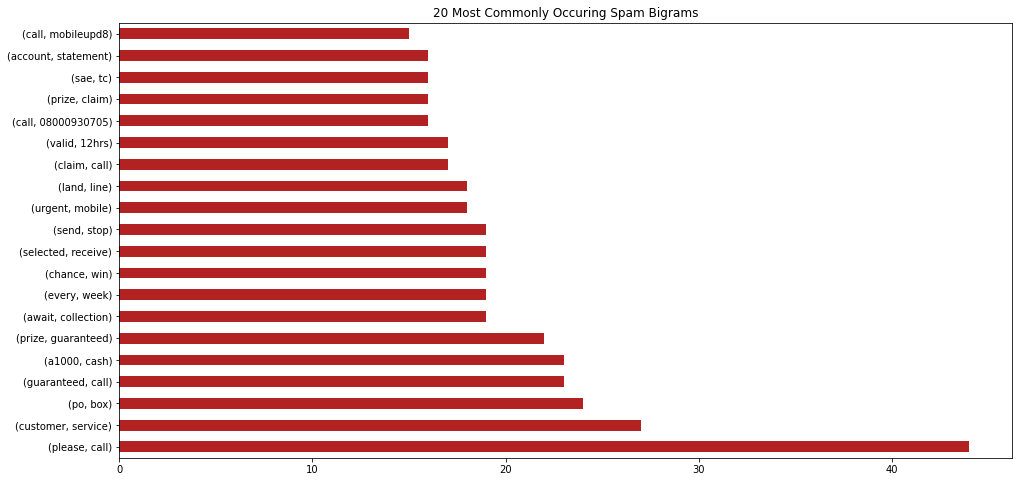

In [13]:
pd.Series(spam_bigrams).value_counts().head(20).plot.barh(color="firebrick")
plt.title("20 Most Commonly Occuring Spam Bigrams")
plt.show()

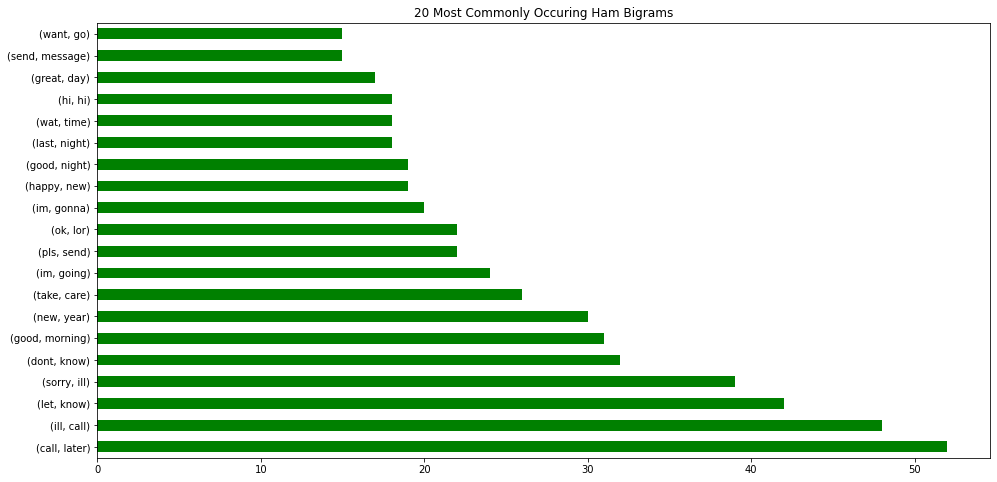

In [14]:
pd.Series(ham_bigrams).value_counts().head(20).plot.barh(color="green")
plt.title("20 Most Commonly Occuring Ham Bigrams")
plt.show()

In [15]:
top_twenty_spam_bigrams = pd.Series(spam_bigrams).value_counts().head(20)
top_twenty_spam_bigrams

(please, call)          44
(customer, service)     27
(po, box)               24
(guaranteed, call)      23
(a1000, cash)           23
(prize, guaranteed)     22
(await, collection)     19
(every, week)           19
(chance, win)           19
(selected, receive)     19
(send, stop)            19
(urgent, mobile)        18
(land, line)            18
(claim, call)           17
(valid, 12hrs)          17
(call, 08000930705)     16
(prize, claim)          16
(sae, tc)               16
(account, statement)    16
(call, mobileupd8)      15
dtype: int64

In [16]:
top_twenty_ham_bigrams = pd.Series(ham_bigrams).value_counts().head(20)
top_twenty_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(pls, send)        22
(ok, lor)          22
(im, gonna)        20
(happy, new)       19
(good, night)      19
(last, night)      18
(wat, time)        18
(hi, hi)           18
(great, day)       17
(send, message)    15
(want, go)         15
dtype: int64

In [17]:
top_twenty_spam_bigrams.to_dict().items()

dict_items([(('please', 'call'), 44), (('customer', 'service'), 27), (('po', 'box'), 24), (('guaranteed', 'call'), 23), (('a1000', 'cash'), 23), (('prize', 'guaranteed'), 22), (('await', 'collection'), 19), (('every', 'week'), 19), (('chance', 'win'), 19), (('selected', 'receive'), 19), (('send', 'stop'), 19), (('urgent', 'mobile'), 18), (('land', 'line'), 18), (('claim', 'call'), 17), (('valid', '12hrs'), 17), (('call', '08000930705'), 16), (('prize', 'claim'), 16), (('sae', 'tc'), 16), (('account', 'statement'), 16), (('call', 'mobileupd8'), 15)])

In [18]:
spam_data = {k[0] + " " + k[1]: v for k, v in top_twenty_spam_bigrams.to_dict().items()}
spam_data

{'please call': 44,
 'customer service': 27,
 'po box': 24,
 'guaranteed call': 23,
 'a1000 cash': 23,
 'prize guaranteed': 22,
 'await collection': 19,
 'every week': 19,
 'chance win': 19,
 'selected receive': 19,
 'send stop': 19,
 'urgent mobile': 18,
 'land line': 18,
 'claim call': 17,
 'valid 12hrs': 17,
 'call 08000930705': 16,
 'prize claim': 16,
 'sae tc': 16,
 'account statement': 16,
 'call mobileupd8': 15}

In [19]:
ham_data = {k[0] + " " + k[1]: v for k, v in top_twenty_ham_bigrams.to_dict().items()}
ham_data

{'call later': 52,
 'ill call': 48,
 'let know': 42,
 'sorry ill': 39,
 'dont know': 32,
 'good morning': 31,
 'new year': 30,
 'take care': 26,
 'im going': 24,
 'pls send': 22,
 'ok lor': 22,
 'im gonna': 20,
 'happy new': 19,
 'good night': 19,
 'last night': 18,
 'wat time': 18,
 'hi hi': 18,
 'great day': 17,
 'send message': 15,
 'want go': 15}

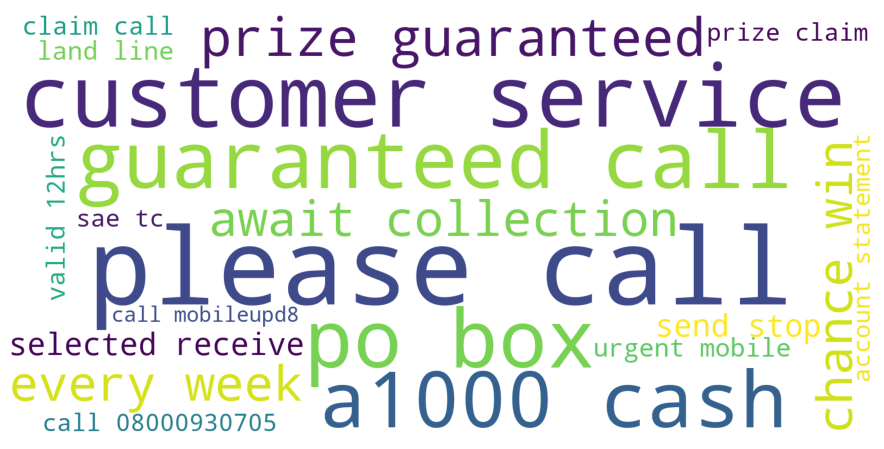

In [20]:
# spam wordcloud
spam_cloud = WordCloud(background_color="white", width=1600, height=800).generate_from_frequencies(spam_data)
plt.imshow(spam_cloud)
plt.axis("off")
plt.show()

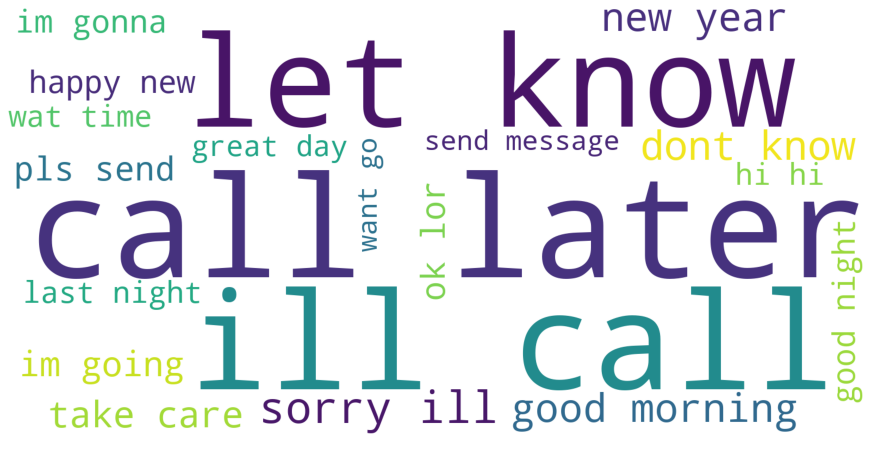

In [21]:
# spam wordcloud
ham_cloud = WordCloud(background_color="white", width=1600, height=800).generate_from_frequencies(ham_data)
plt.imshow(ham_cloud)
plt.axis("off")
plt.show()

## 3. Is there any overlap in the bigrams for the spam data and the ham data?

In [22]:
spam_in_ham = [bigram for bigram in spam_bigrams if bigram in ham_bigrams]

In [23]:
# number of spam bigrams in ham 
print(f"""There are {len(spam_in_ham)} spam bigrams that are also in the ham bigrams.""")

There are 503 spam bigrams that are also in the ham bigrams.


In [24]:
ham_in_spam = [bigram for bigram in ham_bigrams if bigram in spam_bigrams]

In [25]:
# number of ham bigrams in spam 
print(f"""There are {len(ham_in_spam)} ham bigrams that are also in the spam bigrams.""")

There are 462 ham bigrams that are also in the spam bigrams.


## 4. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.